## Project : Automate the Analysis of Stocks Market Report For each day from Nifty 50 
- Step1 : Download the file Manually from Nifty ( data given)
- Step2 : Clean the file and Do the univariate Analysis and Bivariate Analysis to understand the data.
- Step3 : Build the Data Dictionary and assumptions during the EDA phase
- Step4 : Build the Distribution analysis table
- step5 : Build a functinality to embed the plots in HTML pages 
- Step6 : Write the HTML file to the directory in different folder 
- Step7 : Convert the codes in functions 

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import *

In [31]:
import os
os.chdir("C:\\Users\\v.bq.kumar\\Documents\\Tutor\\Mehak_Juneja\\Ipython_notebooks\\Projects\\Project_1")

In [33]:
# Read the data from the Data Folder ?
df=pd.read_csv(r"data\NIFTY_50.csv")

In [34]:
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5208 non-null   object 
 1   Open       5208 non-null   float64
 2   High       5208 non-null   float64
 3   Low        5208 non-null   float64
 4   Close      5208 non-null   float64
 5   Volume     5208 non-null   int64  
 6   Turnover   5208 non-null   float64
 7   P/E        5208 non-null   float64
 8   P/B        5208 non-null   float64
 9   Div Yield  5208 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 407.0+ KB


In [46]:
df['Date']=pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month-str'] = df['Date'].dt.strftime('%b')
df['Month-str-full'] = df['Date'].dt.strftime('%B')

In [47]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,Month,Year,Month-str,Month-str-full
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95,1,2000,Jan,January
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92,1,2000,Jan,January


# Data Dictionary :
- The Open and Close columns indicate the opening and closing price of the stocks on a particular day.
- The High and Low columns provide the highest and the lowest price for the stock on a particular day, respectively.
- The Volume column tells us the total volume of stocks traded on a particular day.
- The Turnover column refers to the total value of stocks traded during a specific period of time. The time period may be annually, quarterly, monthly or daily
- P/E also called as the price-earnings ratio relates a company's share price to its earnings per share.
- P/B also called as Price-To-Book ratio measures the market's valuation of a company relative to its book value.
- Div Yield or the dividend yield is the amount of money a company pays shareholders (over the course of a year) for owning a share of its stock divided by its current stock price—displayed as a percentage.

# Health check of Dataset
- Step 1 : Perform the Missing value Analysis :
    - Find the missing values ( if any in any column ) ?
    - Perform missing value imputation 
    
- Step 2 : Check the distribution of features in the dataset
    - Plot the distribution for the features. 
    - Calculate the mean , median , mode , standard deviation , variance of each column in a table
    - Plot the correlation plots of all the features and note down the observations 

- Step 3 : Feature Engineering to create more relevant features
    - Create Month , year , quarter columns using date column
    
    

In [126]:
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
Turnover          0
P/E               0
P/B               0
Div Yield         0
Month             0
Year              0
Month-str         0
Month-str-full    0
dtype: int64

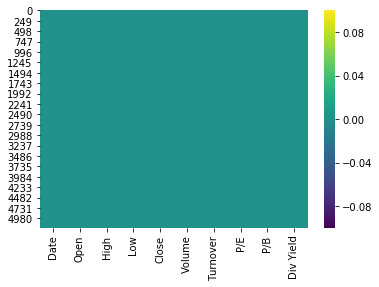

In [39]:
sns.heatmap(df.isnull(),cmap='viridis')

(0, 846892615990.5941)

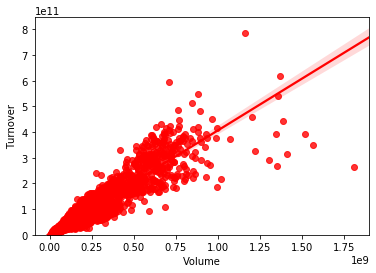

In [127]:
sns.regplot(x='Volume',y='Turnover',data=df,color='red')
plt.ylim(0,)

In [128]:
# To keep the control , how much proportion of missing values is permissible for our future processing ?
limit=0.3
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= limit]]
print("List of dropped columns:")
if len(df.columns)==len(df2.columns):
    print("There are no Columns having missing values greater than ==> ",limit)
else:
    for c in df.columns:
        if c not in df2.columns:
            print(c, end=", ")
print('\n')

List of dropped columns:
There are no Columns having missing values greater than ==>  0.3




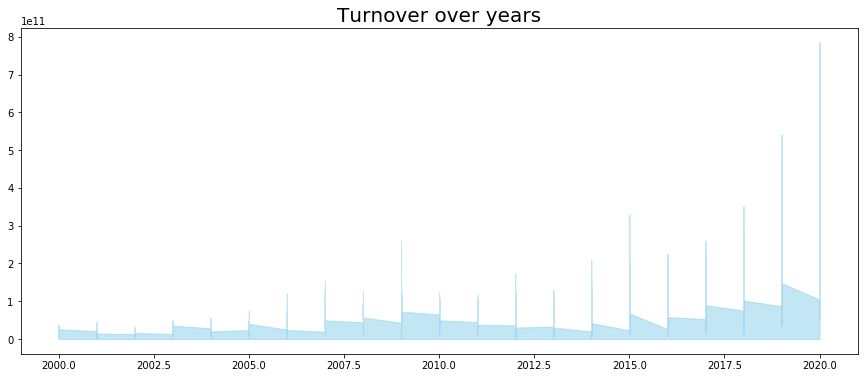

In [135]:
plt.figure(figsize=(15,6))
plt.fill_between(x=df['Year'],y1=df['Turnover'], color="skyblue", alpha=0.5)
plt.title("Turnover over years",fontsize=20)
plt.savefig("output/plot8.png")
plt.show()

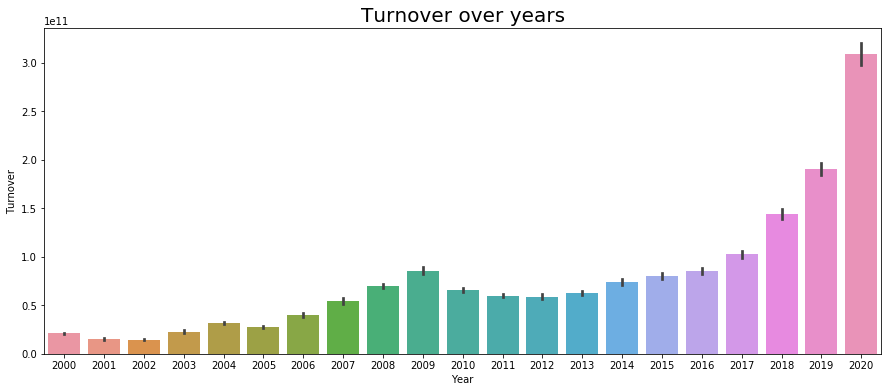

In [73]:
plt.figure(figsize=(15,6))
s1=sns.barplot(x='Year',y='Turnover',data=df)
plt.title("Turnover over years",fontsize=20)
s1.figure.savefig("output/plot1.png")
plt.show()

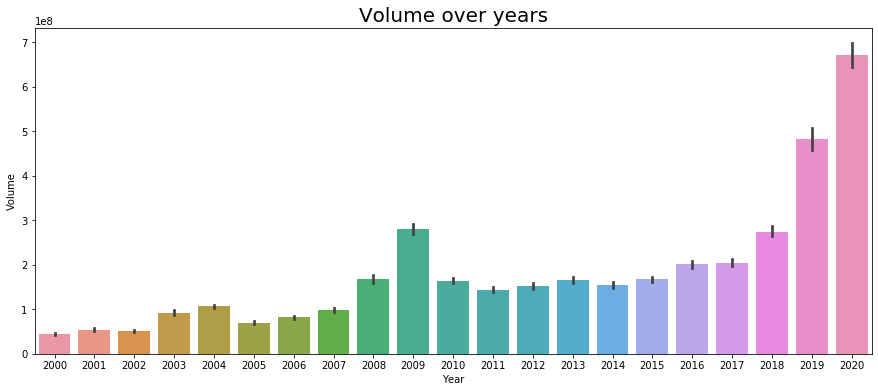

In [75]:
plt.figure(figsize=(15,6))
s1=sns.barplot(x='Year', y='Volume', data=df)
plt.title("Volume over years",fontsize=20)
s1.figure.savefig("output/plot2.png")
plt.show()

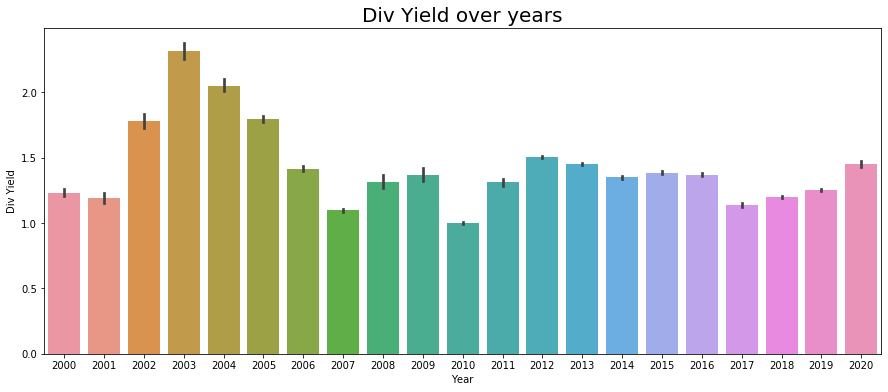

In [76]:
plt.figure(figsize=(15,6))
s1=sns.barplot(x='Year', y='Div Yield', data=df)
plt.title("Div Yield over years",fontsize=20)
s1.figure.savefig("output/plot3.png")
plt.show()

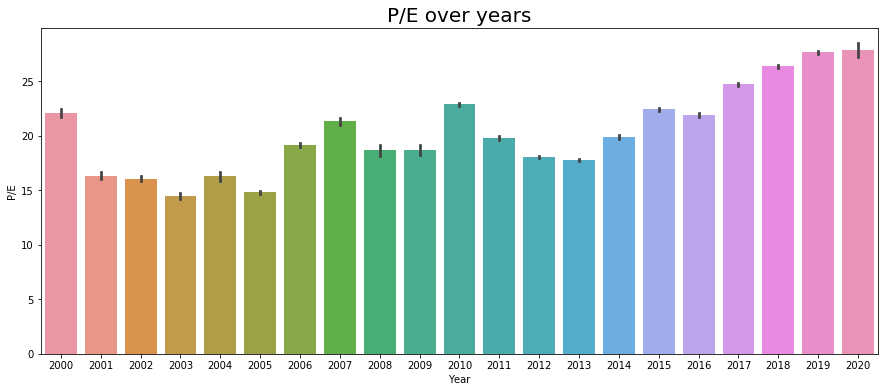

In [77]:
plt.figure(figsize=(15,6))
s1=sns.barplot(x='Year', y='P/E', data=df)
plt.title("P/E over years",fontsize=20)
s1.figure.savefig("output/plot4.png")
plt.show()

# What years had the highest 5 peaks? 

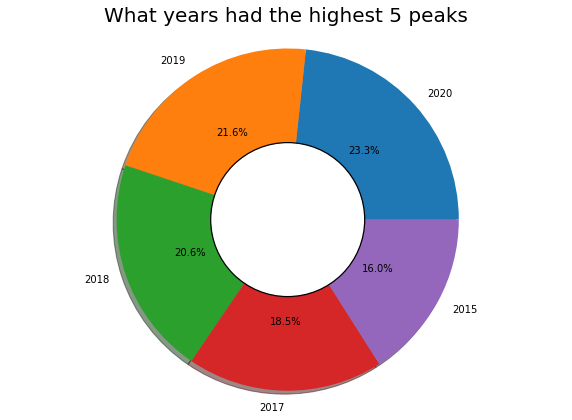

In [99]:
peaks = df.loc[:, ['Year','High']]
peaks['max_high'] = peaks.groupby('Year')['High'].transform('max')
peaks.drop('High', axis=1, inplace=True)
peaks = peaks.drop_duplicates()
peaks = peaks.sort_values('max_high', ascending=False)
peaks = peaks.head()

fig = plt.figure(figsize=(10,7))
plt.pie(peaks['max_high'], labels=peaks['Year'], autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title("What years had the highest 5 peaks",fontsize=20)
plt.savefig("output/plot5.png")
plt.show()

In [79]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,Month,Year,Month-str,Month-str-full
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95,1,2000,Jan,January
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92,1,2000,Jan,January


In [110]:
pd.set_option("precision", 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [111]:
piv=df.groupby('Year').agg({'Volume':['mean','min','max'],
                       'Turnover':['mean','min','max'],
                       'High':['mean','min','max']})
piv

Volume                                Turnover                  \
              mean        min         max             mean             min   
Year                                                                         
2000  45244467.028   14447058   107922822  21057677200.000  5116600000.000   
2001  53882636.641    1394931   150441998  15014450000.000   401200000.000   
2002  50630234.211   20401035   104258064  14480847808.765  5563100000.000   
2003  91805504.898   19834836   233905141  22968947244.094  6329900000.000   
2004 106598310.524   21421309   204439801  31959339370.079  4760900000.000   
2005  70260452.697   18746555   137984563  27471997609.562  6657500000.000   
2006  82008456.268   10531676   191025581  39892805600.000  4332900000.000   
2007  98084045.273   21389583   301117809  53974475502.008 12213400000.000   
2008 167597027.650   51206468   386314136  69730695934.959 10382400000.000   
2009 281703338.395    2768292   686898999  85823680658.436  1139900000.000   
2010 163992598.476   22091127   371673464  66065911904.762  6431100000.000   
2011 143896341.142   27496887   317245759  59985426315.789 10594600000.000   
2012 153069099.980    6555703   364660634  58856179681.275  2978900000.000   
2013 165444272.228    7991165   437039204  63094241200.000  3557400000.000   
2014 154763903.488    9774392   393156741  74012970491.803  3736600000.000   
2015 167678446.698   22380435   418959074  80212116532.258 11234400000.000   
2016 200794425.526   16610872   487969285  85551172064.777  8058900000.000   
2017 204210548.270   31086379   612620774 102796230645.161 16851600000.000   
2018 274693425.659   32194181   741153209 143867330894.309 15340800000.000   
2019 483281915.596  159404542  1414837250 190171827346.939 35482100000.000   
2020 671540589.261  107868139  1811564187 309263767948.718 51893800000.000   

                           High                      
                  max      mean       min       max  
Year                                                 
2000  37409500000.000  1440.324  1155.350  1818.150  
2001  46158700000.000  1134.478   877.000  1422.950  
2002  31288600000.000  1064.767   934.900  1205.950  
2003  51006100000.000  1244.101   931.050  1914.400  
2004  54092500000.000  1774.006  1474.300  2088.450  
2005  73896200000.000  2286.715  1925.600  2857.000  
2006 120555900000.000  3388.747  2767.750  4046.850  
2007 154596800000.000  4616.731  3679.150  6185.400  
2008 125890900000.000  4417.680  2585.300  6357.100  
2009 260022600000.000  4161.107  2621.250  5221.850  
2010 122284500000.000  5498.632  4768.150  6338.500  
2011 117412500000.000  5384.035  4623.150  6181.050  
2012 173567600000.000  5374.330  4645.950  5965.150  
2013 129642000000.000  5954.561  5317.700  6415.250  
2014 210570700000.000  7397.670  6017.800  8626.950  
2015 328734500000.000  8337.654  7663.950  9119.200  
2016 225342900000.000  8136.359  7034.200  8968.700  
2017 259225100000.000  9625.885  8212.000 10552.400  
2018 351311900000.000 10801.753 10027.700 11760.200  
2019 540815300000.000 11494.463 10690.350 12293.900  
2020 785229300000.000 11067.345  8036.950 13280.050

In [139]:
#Converting to HTML
# saving plot image to local file
image_tag = """<img src="C:\\Users\\v.bq.kumar\\Documents\\Tutor\\Mehak_Juneja\\Ipython_notebooks\\Projects\\Project_1\\output\\plot1.png"> 
               <img src="C:\\Users\\v.bq.kumar\\Documents\\Tutor\\Mehak_Juneja\\Ipython_notebooks\\Projects\\Project_1\\output\\plot2.png">
               <img src="C:\\Users\\v.bq.kumar\\Documents\\Tutor\\Mehak_Juneja\\Ipython_notebooks\\Projects\\Project_1\\output\\plot3.png">
               <img src="C:\\Users\\v.bq.kumar\\Documents\\Tutor\\Mehak_Juneja\\Ipython_notebooks\\Projects\\Project_1\\output\\plot4.png">
               <img src="C:\\Users\\v.bq.kumar\\Documents\\Tutor\\Mehak_Juneja\\Ipython_notebooks\\Projects\\Project_1\\output\\plot5.png">
        
        """
#writing HTML Content
heading = '<h1> Automated Report Tutorial by Mehak Juneja </h1>'
subheading = '<h3> Sample Report for Daily Analysis ( nifty 50 ) </h3>'
# Using .now() from datetime library to add Time stamp
now = datetime.now()
current_time = now.strftime("%m/%d/%Y %H:%M:%S")
header = '<div class="top">' + heading + subheading +'</div>'
footer = '<div class="bottom"> <h3> This Report has been Generated on '+ current_time +'</h3> </div>'
content = '<div class="table"> '+piv.to_html()+' </div> <div class="chart"> '+ image_tag +'</div>'
css = '<style> body {\n text-align:center; \n}\n table{\n margin:0px auto;\n}</style>'
# Concating everything to a single string
html = header + content + footer
html=html+css

In [140]:
# Writing the file
with open(r'output/report.html','w+') as file:
    file.write(html)